# Rare diseases analyisis: a comprehensive study on diagnosis and treatment

## Elizabeth Adafesian
#### Day last edited: May 5, 2025


##### Summary: Our developer chose this data set to see if we can run a predictive model on the likelhood of rare disease based on a multidue of variables. In this model, we hypothesize that at least two variables show a strongly correlational assocation which makes it predictive of a genetic disorder

#### Let us begin by downloading all the important test

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

### We will now download our data set. Our data set involves prediciton of genetic diseases

    First, lets read our data set.

In [33]:
df = pd.read_csv('/Users/elizabethadefisan/Downloads/train_genetic_disorders.csv')
# Now that we have dowloaded the data, we can start to analyze it.
#First, lets see how many data variable we have
df.shape
#Wow, thats a lot of variables. Let see the names of the columns
df.columns
print(df.head())
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)


  Patient Id  Patient Age Genes in mother's side Inherited from father  \
0  PID0x6418          2.0                    Yes                    No   
1  PID0x25d5          4.0                    Yes                   Yes   
2  PID0x4a82          6.0                    Yes                    No   
3  PID0x4ac8         12.0                    Yes                    No   
4  PID0x1bf7         11.0                    Yes                    No   

  Maternal gene Paternal gene  Blood cell count (mcL) Patient First Name  \
0           Yes            No                4.760603            Richard   
1            No            No                4.910669               Mike   
2            No            No                4.893297           Kimberly   
3           Yes            No                4.705280            Jeffery   
4           NaN           Yes                4.720703            Johanna   

  Family Name Father's name  ...  Birth defects  \
0         NaN         Larre  ...            NaN

This is nice, but I want some Data visualization, so lets choose 4 values to visualize

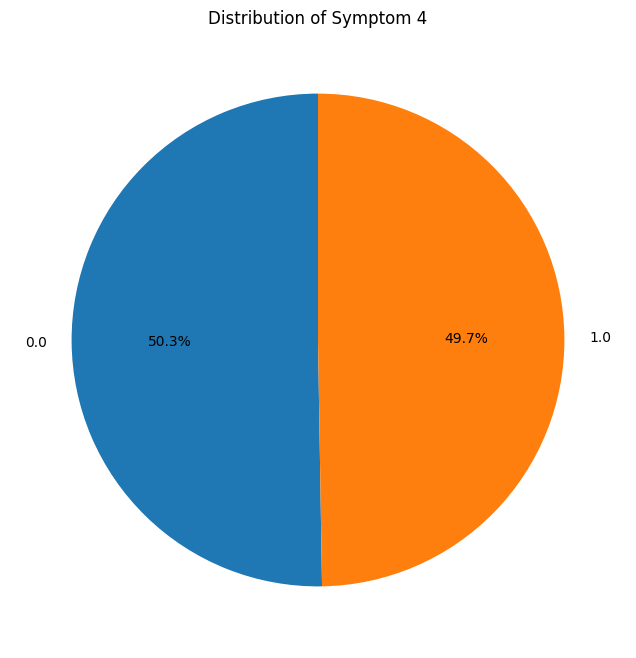

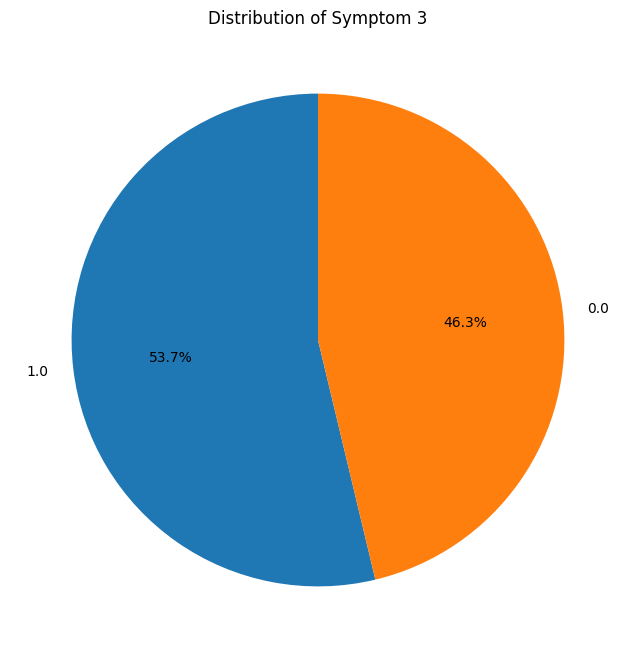

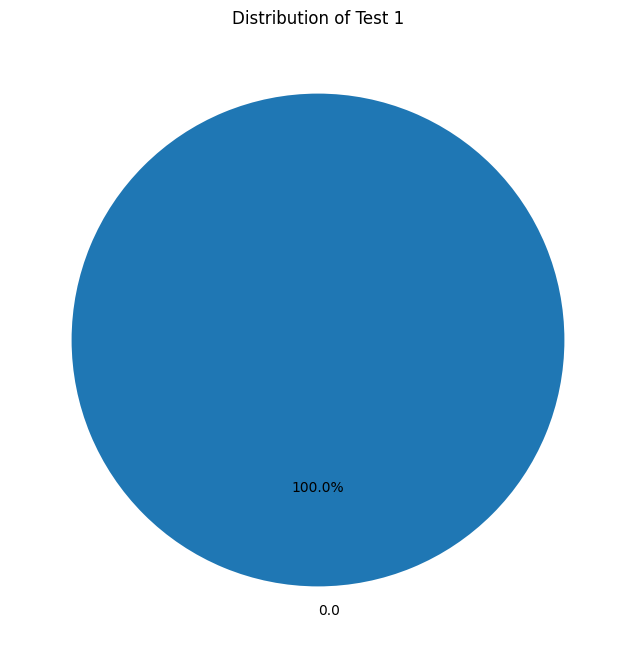

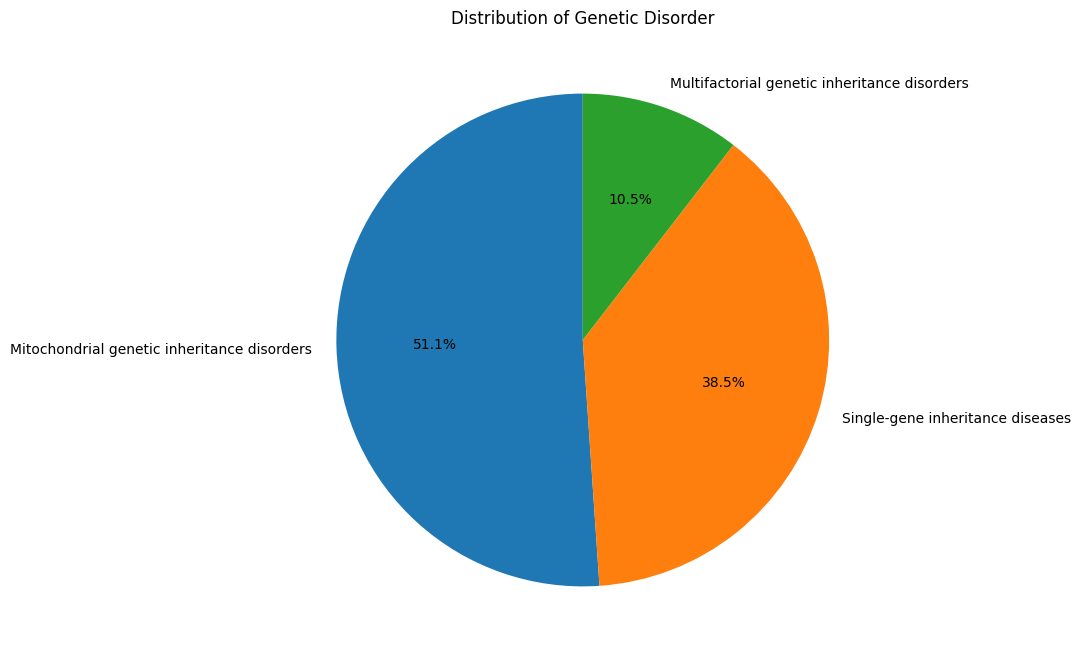

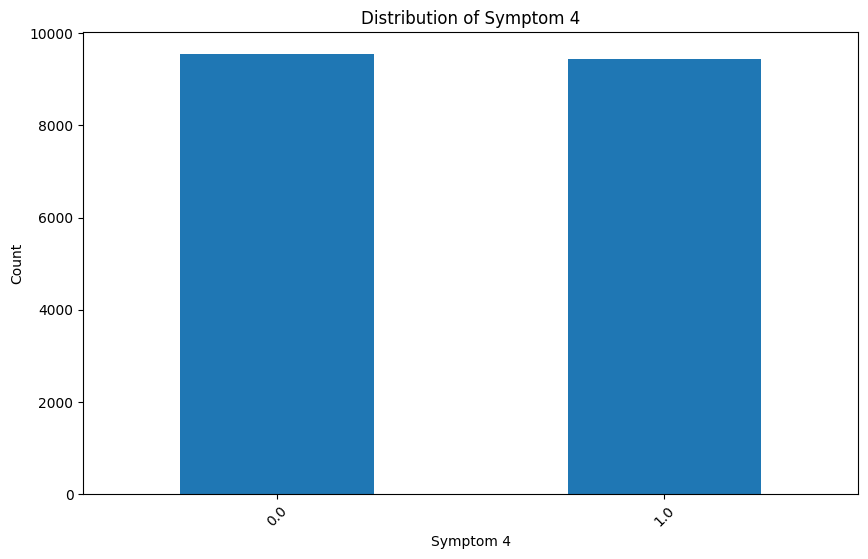

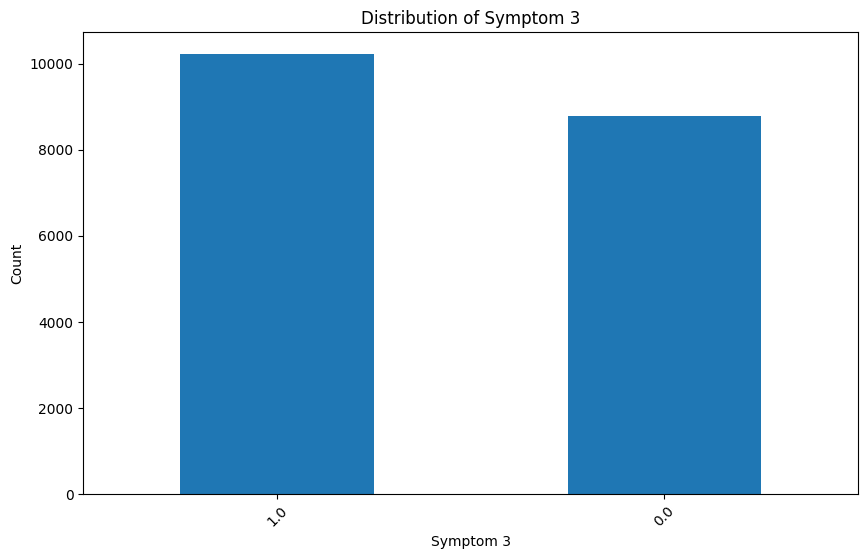

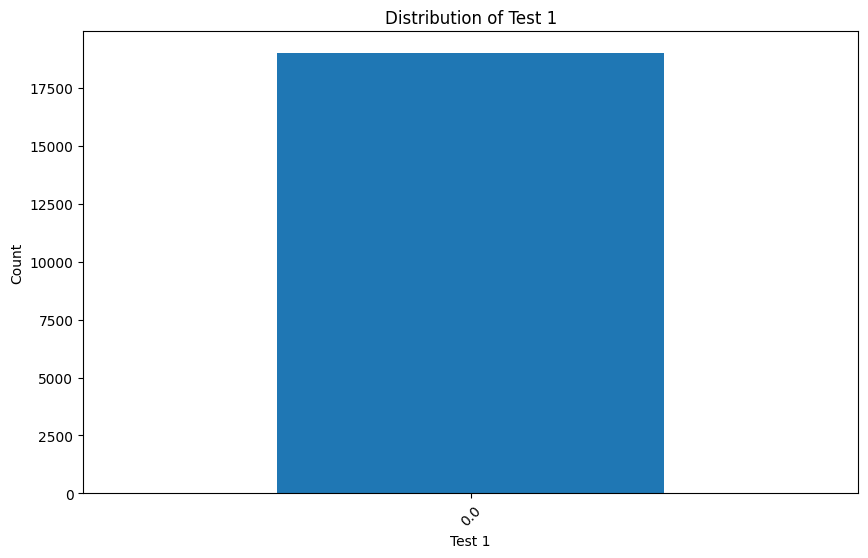

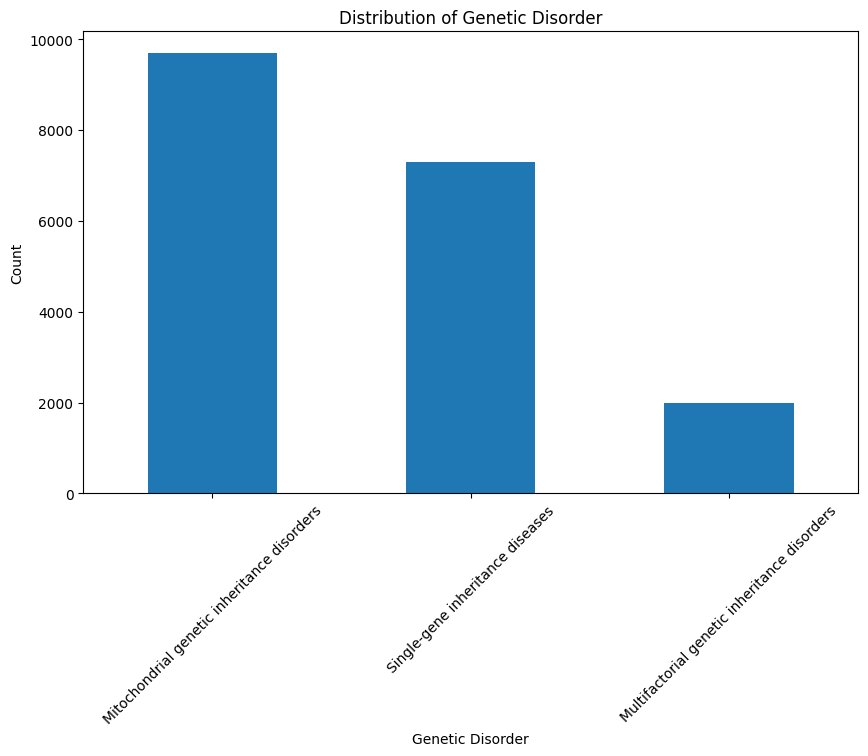

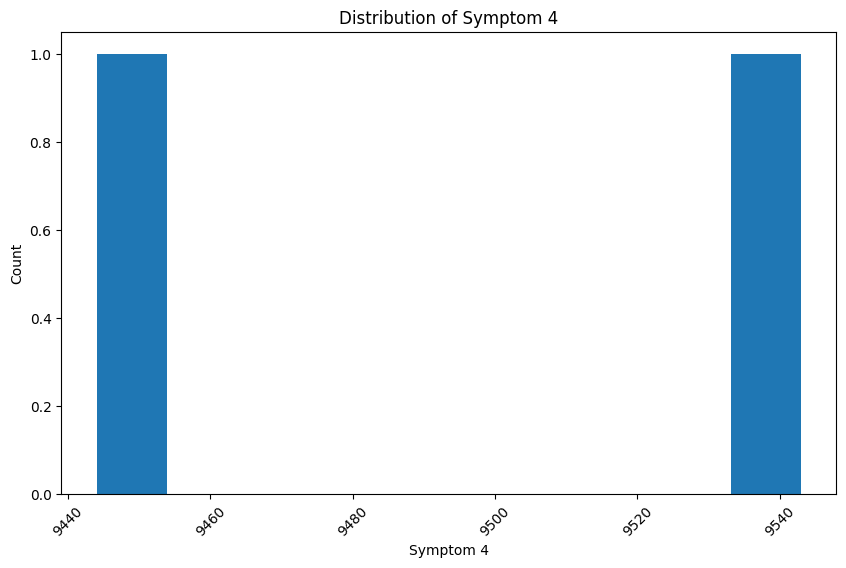

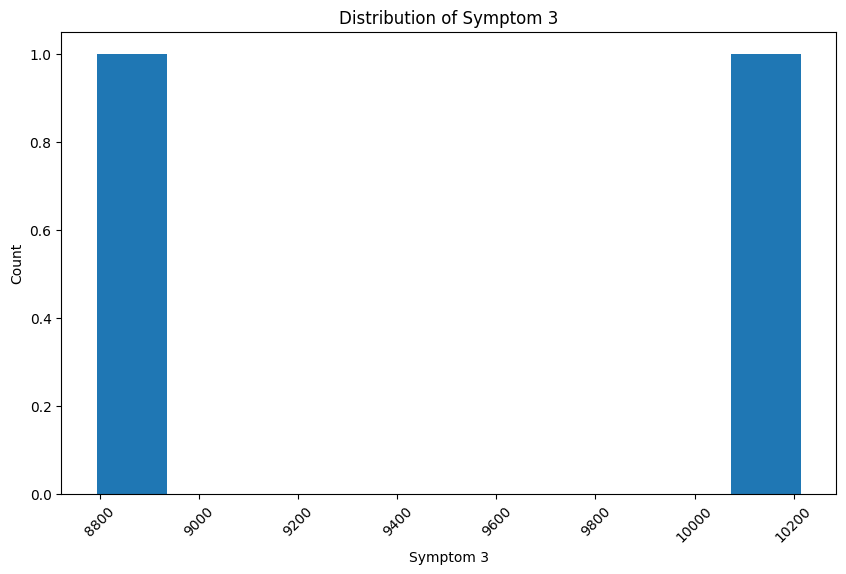

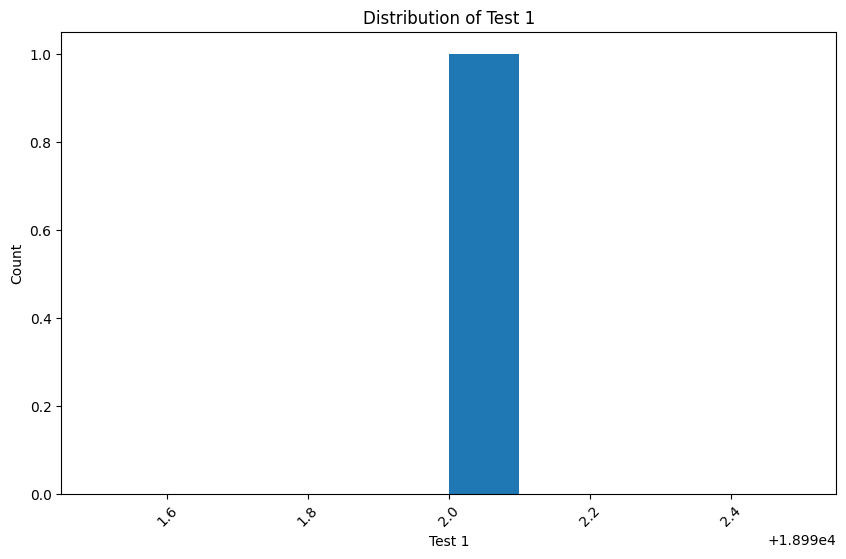

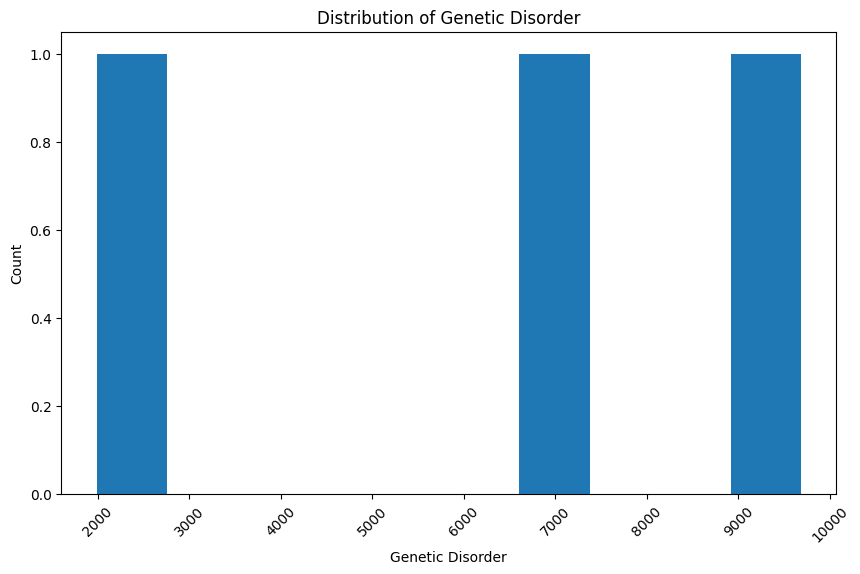

In [43]:
# Lets create a pie chart of variables Symptom 4, Symptom 3, Test 1, and Genetic Disorder,
# Create a pie chart for the 'Symptom 4' column
plt.figure(figsize=(8, 8))
df['Symptom 4'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Symptom 4')
plt.ylabel('')
plt.show()
# Create a pie chart for the 'Symptom 3' column
plt.figure(figsize=(8, 8))

df['Symptom 3'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Symptom 3')
plt.ylabel('')
plt.show()
# Create a pie chart for the 'Test 1' column
plt.figure(figsize=(8, 8))
df['Test 1'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Test 1')
plt.ylabel('')
plt.show()
# Create a pie chart for the 'Genetic Disorder' column
plt.figure(figsize=(8, 8))
df['Genetic Disorder'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Genetic Disorder')
plt.ylabel('')
plt.show()
# Now lets create a bar chart of variables Symptom 4, Symptom 3, Test 1, and Genetic Disorder,
# Create a bar chart for the 'Symptom 4' column
plt.figure(figsize=(10, 6))
df['Symptom 4'].value_counts().plot.bar()
plt.title('Distribution of Symptom 4')
plt.xlabel('Symptom 4')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
# Create a bar chart for the 'Symptom 3' column
plt.figure(figsize=(10, 6))
df['Symptom 3'].value_counts().plot.bar()
plt.title('Distribution of Symptom 3')
plt.xlabel('Symptom 3')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
# Create a bar chart for the 'Test 1' column
plt.figure(figsize=(10, 6))
df['Test 1'].value_counts().plot.bar()
plt.title('Distribution of Test 1')
plt.xlabel('Test 1')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
# Create a bar chart for the 'Genetic Disorder' column
plt.figure(figsize=(10, 6))
df['Genetic Disorder'].value_counts().plot.bar()
plt.title('Distribution of Genetic Disorder')
plt.xlabel('Genetic Disorder')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
# Now lets create a histogram of variables Symptom 4, Symptom 3, Test 1, and Genetic Disorder,
# Create a histogram for the 'Symptom 4' column
plt.figure(figsize=(10, 6))
df['Symptom 4'].value_counts().plot.hist()
plt.title('Distribution of Symptom 4')
plt.xlabel('Symptom 4')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
# Create a histogram for the 'Symptom 3' column
plt.figure(figsize=(10, 6))
df['Symptom 3'].value_counts().plot.hist()
plt.title('Distribution of Symptom 3')
plt.xlabel('Symptom 3')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
# Create a histogram for the 'Test 1' column

plt.figure(figsize=(10, 6))
df['Test 1'].value_counts().plot.hist()
plt.title('Distribution of Test 1')
plt.xlabel('Test 1')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
# Create a histogram for the 'Genetic Disorder' column
plt.figure(figsize=(10, 6))

df['Genetic Disorder'].value_counts().plot.hist()
plt.title('Distribution of Genetic Disorder')
plt.xlabel('Genetic Disorder')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



#### Wonderful, now we will start creating a predictive, correlational model

Before we even begin anything, lets determine our null variables

In [46]:
# First check null values in each column
print("Null values before handling:\n")
print(df.isnull().sum())

# Method 1: Remove rows with any null values
df_clean = df.dropna()

# Method 2: Fill nulls with mean for numeric columns
df_filled = df.copy()
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_filled[numeric_columns] = df_filled[numeric_columns].fillna(df_filled[numeric_columns].mean())

# Method 3: Fill nulls with mode for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
df_filled[categorical_columns] = df_filled[categorical_columns].fillna(df_filled[categorical_columns].mode().iloc[0])

# Verify null values are handled
print("\nNull values after handling:\n")
print(df_filled.isnull().sum())

# Use df_clean or df_filled for your analysis
numeric_df = df_filled.select_dtypes(include=['float64', 'int64'])

Null values before handling:

Patient Id                                           1072
Patient Age                                          2440
Genes in mother's side                               1072
Inherited from father                                1359
Maternal gene                                        3766
Paternal gene                                        1072
Blood cell count (mcL)                               1072
Patient First Name                                   1072
Family Name                                         10312
Father's name                                        1072
Mother's age                                         6790
Father's age                                         6761
Institute Name                                       5932
Location of Institute                                1072
Status                                               1072
Respiratory Rate (breaths/min)                       3131
Heart Rate (rates/min                     

We will use a few variables to get our data, but first let us see if there are some variables that are correlational

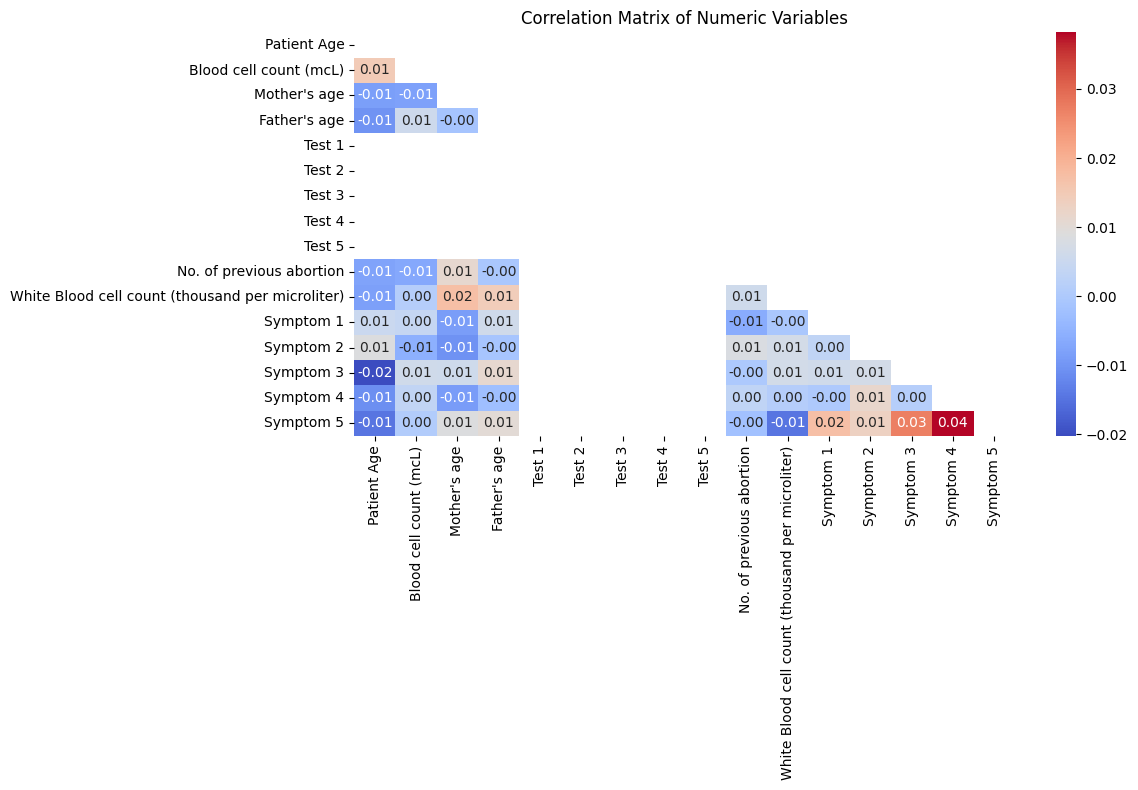

In [47]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation = numeric_df.corr()
# Create heatmap with adjusted figure size
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Color scheme
            fmt='.2f',  # Round to 2 decimal places
            mask=np.triu(np.ones_like(correlation, dtype=bool)))  # Show only lower triangle

plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

So it seems like our results prove non-conclusive. Instead we will run a predictive model and a linear regresion model. But first, we will visualize some valuables

## Linear regression Analysis

Here is a code to determine the linear regression model of our genetic data set

Missing values before handling:
 Patient Age                                         2440
Blood cell count (mcL)                              1072
Mother's age                                        6790
Father's age                                        6761
Test 1                                              3091
Test 2                                              3125
Test 3                                              3113
Test 4                                              3121
Test 5                                              3144
No. of previous abortion                            3126
White Blood cell count (thousand per microliter)    3118
Symptom 1                                           3128
Symptom 2                                           3184
Symptom 3                                           3075
Symptom 4                                           3096
Symptom 5                                           3127
dtype: int64

Missing values after handling:
 Patient A

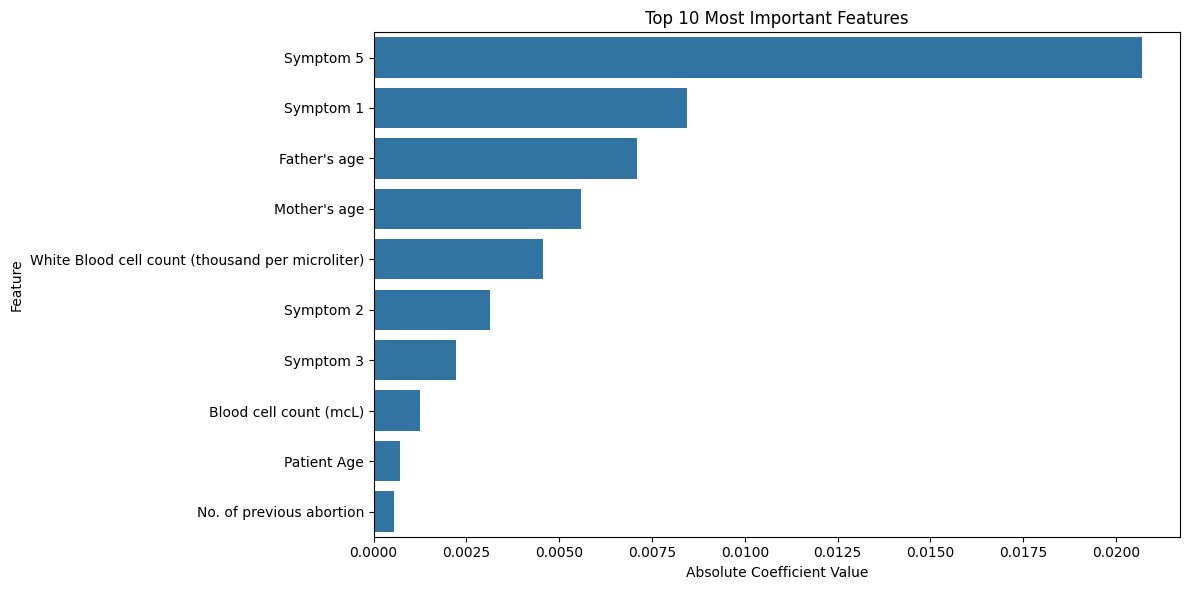

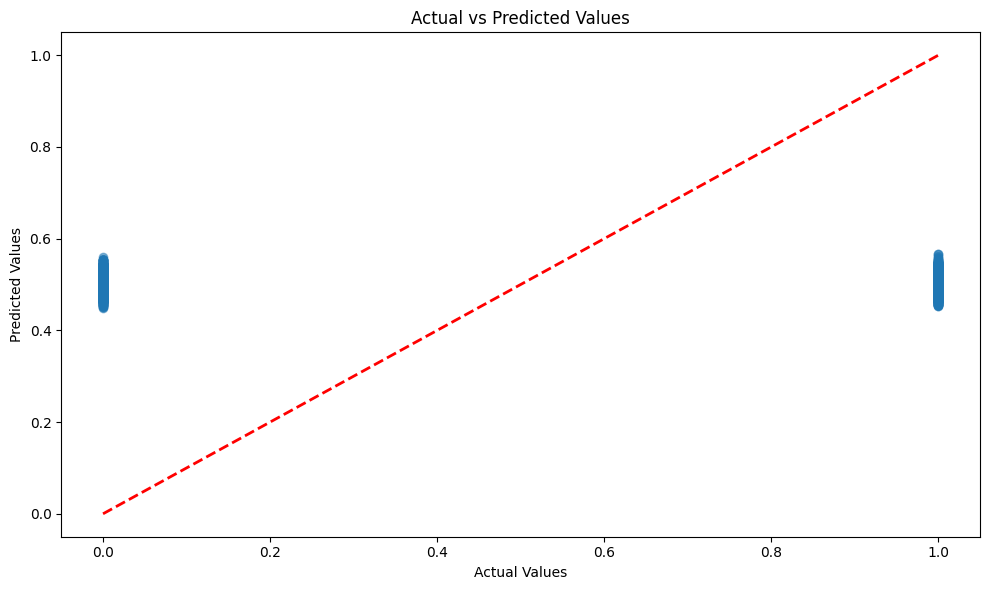

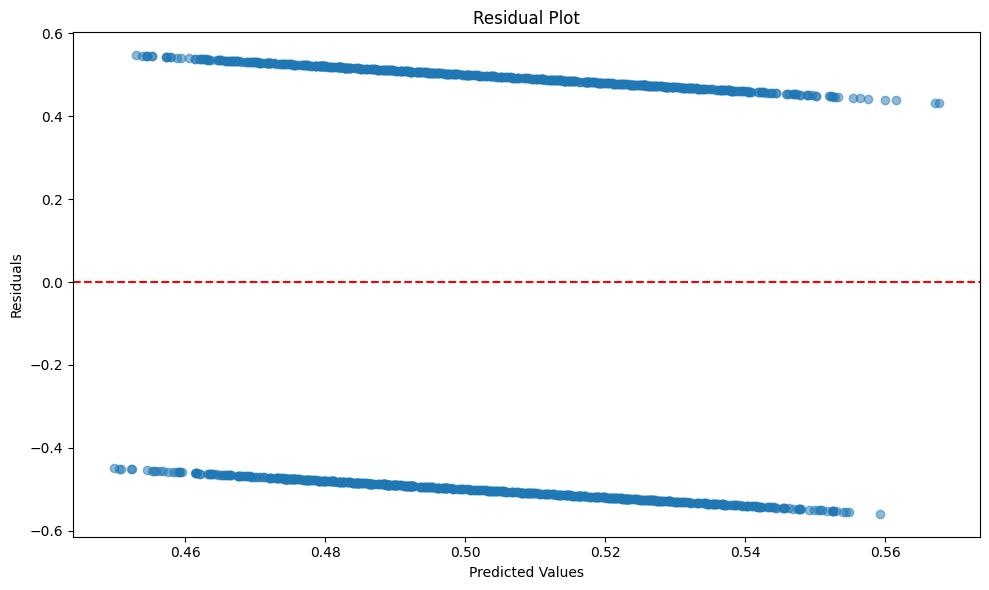

In [48]:
#Select numeric features
# There are a few missing values in the dataset, so we will drop them for now
# df.dropna(inplace=True)  # Uncomment if you want to drop rows with missing values
# Check for missing values
# missing_values = df.isnull().sum()
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Select numeric features and handle missing values
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Check number of missing values per column
print("Missing values before handling:\n", numeric_df.isnull().sum())

# Handle missing values (choose one method):
# Method 1: Remove rows with any missing values
numeric_df = numeric_df.dropna()

# OR Method 2: Fill missing values with mean
# numeric_df = numeric_df.fillna(numeric_df.mean())

# Verify no missing values remain
print("\nMissing values after handling:\n", numeric_df.isnull().sum())

# Proceed with model preparation
X = numeric_df.drop('Symptom 4', axis=1)
y = numeric_df['Symptom 4']

# Rest of your existing code remains the same
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Remove target variable if it's in numeric_df (replace 'target' with your target column)
X = numeric_df.drop('Symptom 4', axis=1)
y = numeric_df['Symptom 4']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Model evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print results
print(f'R-squared Score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')

# Feature importance visualization
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

In [49]:
# great, now lets save the model
import joblib
# Save the model
joblib.dump(model, 'genetic_disorder_model.pkl')
# Save the scaler
joblib.dump(scaler, 'genetic_disorder_scaler.pkl')
# Load the model
loaded_model = joblib.load('genetic_disorder_model.pkl')
# Load the scaler

Before we end, lets do a staistical test to see if any of our values can be conclusive.

In [50]:
# We will run a statistical test to check if the model is statistically significant
import statsmodels.api as sm
# Add a constant to the model
X_train_scaled = sm.add_constant(X_train_scaled)
# Fit the model
model_sm = sm.OLS(y_train, X_train_scaled).fit()
# Print the summary
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              Symptom 4   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.404
Date:                Sun, 04 May 2025   Prob (F-statistic):              0.172
Time:                        19:01:04   Log-Likelihood:                -4138.6
No. Observations:                5712   AIC:                             8299.
Df Residuals:                    5701   BIC:                             8372.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5030      0.007     76.049      0.0

Okay, it seems like there is a very small correlation. Lets see what Chi square tells us.

Chi-Square Test Results:

Significant relationships (p < 0.05):
               chi2   p_value  degrees_of_freedom
Symptom 5  9.802413  0.001743                   1


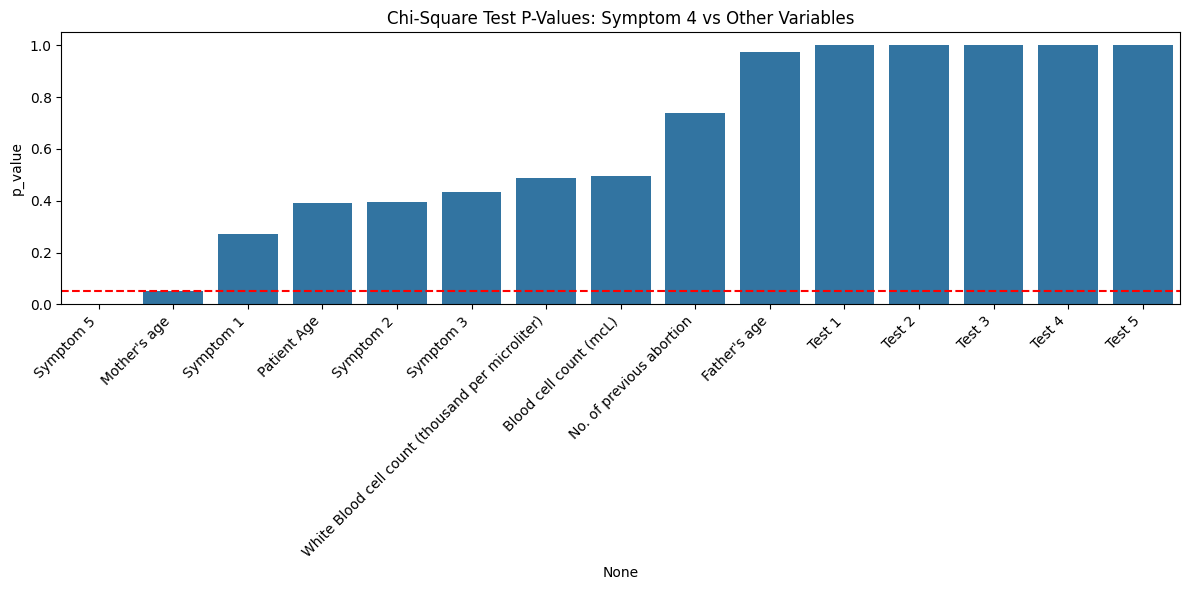

In [51]:
# Import required libraries
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np

# Select numeric columns excluding Symptom 4
numeric_columns = numeric_df.select_dtypes(include=['float64', 'int64']).columns
other_symptoms = [col for col in numeric_columns if col != 'Symptom 4']

# Create dictionary to store chi-square results
chi_square_results = {}

# Perform chi-square test for each variable with Symptom 4
for column in other_symptoms:
    # Create contingency table
    contingency = pd.crosstab(numeric_df['Symptom 4'], numeric_df[column])
    
    # Perform chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency)
    
    # Store results
    chi_square_results[column] = {
        'chi2': chi2,
        'p_value': p_value,
        'degrees_of_freedom': dof
    }

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame.from_dict(chi_square_results, orient='index')
results_df = results_df.sort_values('p_value')

# Print results
print("Chi-Square Test Results:")
print("\nSignificant relationships (p < 0.05):")
print(results_df[results_df['p_value'] < 0.05])

# Optional: Create visualization of p-values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y='p_value', data=results_df)
plt.xticks(rotation=45, ha='right')
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Level (p=0.05)')
plt.title('Chi-Square Test P-Values: Symptom 4 vs Other Variables')
plt.tight_layout()
plt.show()

So mothers age seems to be a factor. Lets use this to predict more stuff.

Available columns: ['Patient Age', 'Blood cell count (mcL)', "Mother's age", "Father's age", 'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5', 'No. of previous abortion', 'White Blood cell count (thousand per microliter)', 'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5']

Classification Report:
              precision    recall  f1-score   support

         0.0       0.52      0.43      0.47       725
         1.0       0.50      0.60      0.55       704

    accuracy                           0.51      1429
   macro avg       0.51      0.51      0.51      1429
weighted avg       0.51      0.51      0.51      1429



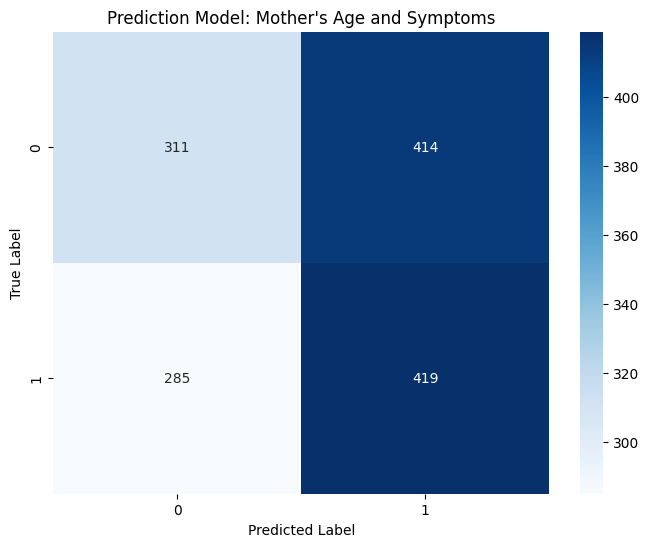

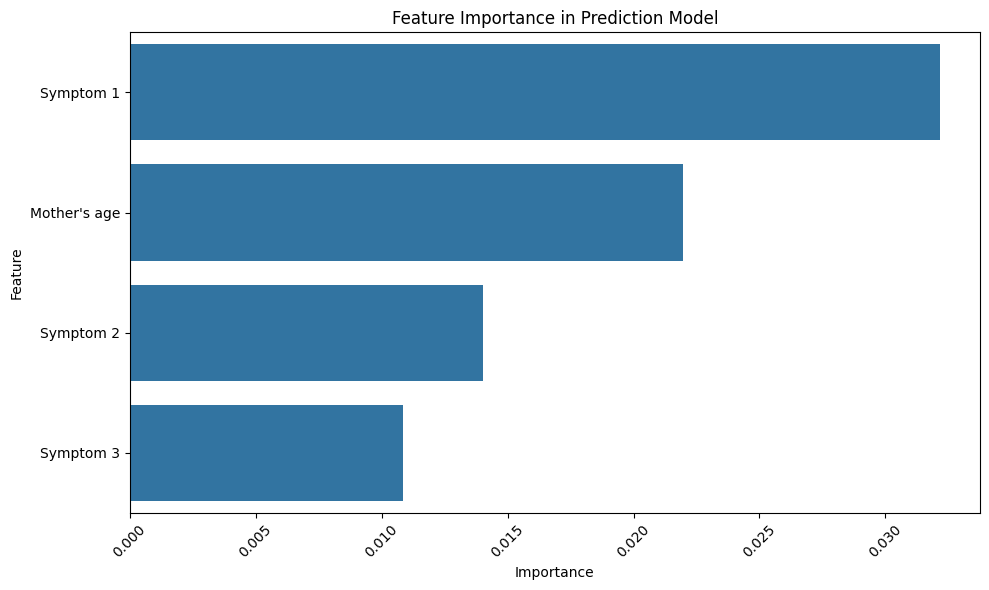

In [55]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# First, let's verify our columns
print("Available columns:", numeric_df.columns.tolist())

# Select relevant features
features = ["Mother's age", 'Symptom 1', 'Symptom 2', 'Symptom 3']
target = 'Symptom 4'

# Prepare the data
X = numeric_df[features]
y = numeric_df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Print model performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Prediction Model: Mother's Age and Symptoms")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature importance
importance = pd.DataFrame({
    'Feature': features,
    'Importance': abs(model.coef_[0])
})
importance = importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title('Feature Importance in Prediction Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

It seems like its marginally accurate predictive model. This seems like the best thing we have to predict the likelihood of a genetic disease!

In conclusion, we can reasonably expect that Symptom 4 and 5, and Mother's age werre the best predictors of genetic diseases likelohood!